# Predictions of amounts of tips

## Library

In [42]:
import seaborn as sns
#- ! bs4 모듈이 설치되어 있어야 합니다. -#
sns.get_dataset_names()
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/home/aiffel0036/anaconda3/envs/aiffel/lib/python3.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/aiffel0036/anaconda3/envs/aiffel/lib/python3.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


## Import Data

In [7]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [9]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


- Linear model:   
$ y = w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 + w_6x_6 + w_7x_7 + w_8x_8 + w_9x_9 + w_{10}x_{10} + w_{11}x_{11} + w_{12}x_{12} + w_0  $

In [10]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values

## Train Test 분리

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


## Model 

In [13]:
W = np.random.rand(12)
b = np.random.rand()

In [22]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [23]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean() 
    return mse

In [24]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [25]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [26]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [2045.88985847  280.37446902   72.78104847   29.56088988   38.50734537
   63.83459298   24.33796927    8.31120718   32.73323581   36.95952609
   27.30252676   75.03941159]
db: 5.033210082792879


In [27]:
LEARNING_RATE = 0.0001

In [28]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 2.3228
Iteration 20 : Loss 2.2530
Iteration 30 : Loss 2.1899
Iteration 40 : Loss 2.1306
Iteration 50 : Loss 2.0749
Iteration 60 : Loss 2.0224
Iteration 70 : Loss 1.9731
Iteration 80 : Loss 1.9266
Iteration 90 : Loss 1.8829
Iteration 100 : Loss 1.8417
Iteration 110 : Loss 1.8029
Iteration 120 : Loss 1.7663
Iteration 130 : Loss 1.7318
Iteration 140 : Loss 1.6993
Iteration 150 : Loss 1.6686
Iteration 160 : Loss 1.6396
Iteration 170 : Loss 1.6123
Iteration 180 : Loss 1.5864
Iteration 190 : Loss 1.5620
Iteration 200 : Loss 1.5390
Iteration 210 : Loss 1.5172
Iteration 220 : Loss 1.4965
Iteration 230 : Loss 1.4770
Iteration 240 : Loss 1.4585
Iteration 250 : Loss 1.4410
Iteration 260 : Loss 1.4245
Iteration 270 : Loss 1.4087
Iteration 280 : Loss 1.3938
Iteration 290 : Loss 1.3797
Iteration 300 : Loss 1.3662
Iteration 310 : Loss 1.3535
Iteration 320 : Loss 1.3414
Iteration 330 : Loss 1.3299
Iteration 340 : Loss 1.3189
Iteration 350 : Loss 1.3085
Iteration 360 : Loss 1.2986
I

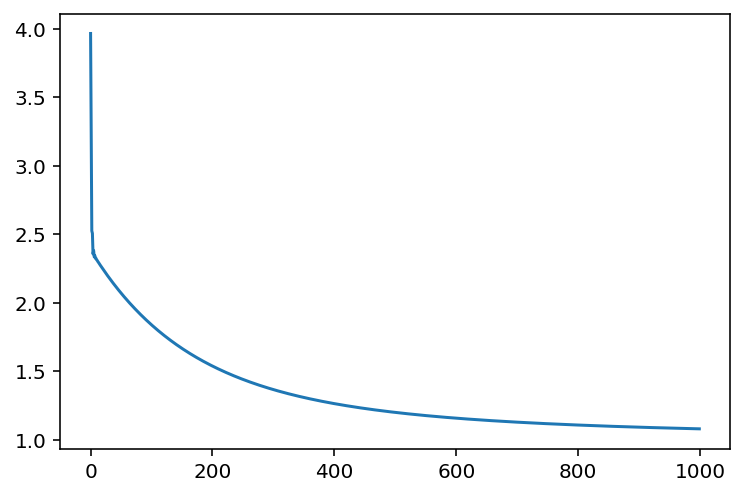

In [34]:
plt.plot(losses)
plt.show()

In [35]:
W,b

(array([ 0.08122117,  0.09836391,  0.31697388,  0.13423339,  0.32018343,
         0.34567727,  0.08530541,  0.60573952,  0.14898633,  0.46906634,
        -0.06508169, -0.29986322]),
 0.6421897744636313)

## Test

In [36]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

0.6926590723129399

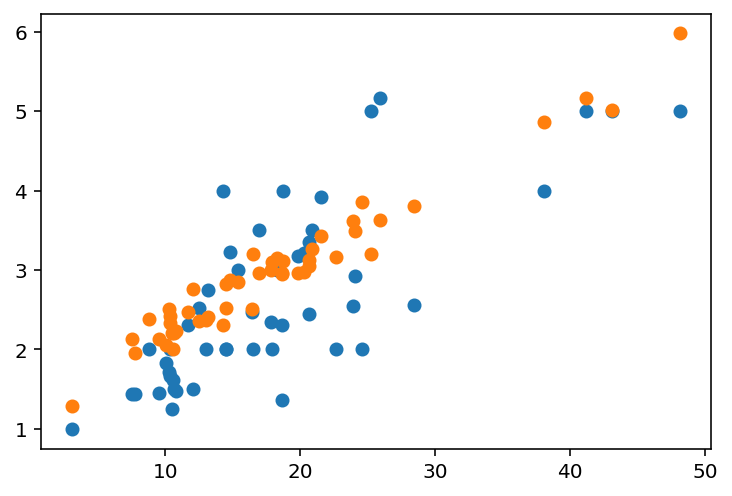

In [37]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## library 모델 사용

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
predictions = model.predict(X_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [43]:
mse = mean_squared_error(y_test,predictions)
mse

0.7033566017436103

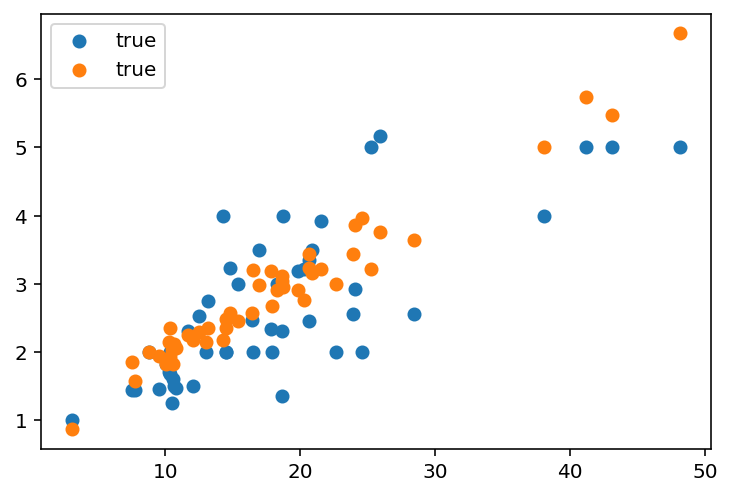

In [44]:
plt.scatter(X_test[:,0],y_test,label="true")
plt.scatter(X_test[:,0],predictions,label="true")
plt.legend()
plt.show()